### **Actividad Semanal -- 6, visualización**

Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [ ]:
input = "https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo_112/main/default%20of%20credit%20card%20clients.csv"

In [ ]:
pca = pd.read_csv(input, index_col=0)
pca.index.name = None
pca

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [ ]:
pca.shape

(30000, 24)

In [ ]:
print(pca.describe)

<bound method NDFrame.describe of            X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19

In [ ]:
pca.rename(columns={'X1': 'Credit', 'X2': 'Gender', 'X3': 'Education', 'X4': 'Marital_Status', 'X5': 'Age', 'X6': 'Payments_September', 'X7': 'Payments_August', 'X8': 'Payments_July', 'X9': 'Payments_June', 'X10': 'Payments_May', 'X11': 'Payments_April'}, inplace=True)
pca.rename(columns={'X12': 'Bill_September', 'X13': 'Bill_August', 'X14': 'Bill_July', 'X15': 'Bill_June', 'X16': 'Bill_May', 'X17': 'Bill_April'}, inplace=True)
pca.rename(columns={'X18': 'Previuos_September', 'X19': 'Previuos_August', 'X20': 'Previuos_July', 'X21': 'Previuos_June', 'X22': 'Previous_May', 'X23': 'Previuos_April'}, inplace=True)
pca.head() # mostrar los primeros de los datos

,Credit,Gender,Education,Marital_Status,Age,Payments_September,Payments_August,Payments_July,Payments_June,Payments_May,...,Bill_June,Bill_May,Bill_April,Previuos_September,Previuos_August,Previuos_July,Previuos_June,Previous_May,Previuos_April,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
print("Columnas", pca.columns)

Columnas Index(['Credit', 'Gender', 'Education', 'Marital_Status', 'Age',
       'Payments_September', 'Payments_August', 'Payments_July',
       'Payments_June', 'Payments_May', 'Payments_April', 'Bill_September',
       'Bill_August', 'Bill_July', 'Bill_June', 'Bill_May', 'Bill_April',
       'Previuos_September', 'Previuos_August', 'Previuos_July',
       'Previuos_June', 'Previous_May', 'Previuos_April', 'Y'],
      dtype='object')


In [ ]:
print("Tipos", pca.dtypes)

Tipos Credit                  int64
Gender                float64
Education             float64
Marital_Status        float64
Age                   float64
Payments_September    float64
Payments_August       float64
Payments_July         float64
Payments_June         float64
Payments_May          float64
Payments_April        float64
Bill_September        float64
Bill_August           float64
Bill_July             float64
Bill_June             float64
Bill_May              float64
Bill_April            float64
Previuos_September    float64
Previuos_August       float64
Previuos_July         float64
Previuos_June         float64
Previous_May          float64
Previuos_April        float64
Y                     float64
dtype: object


In [ ]:
pca.info() #Informacion de cada columna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Credit              30000 non-null  int64  
 1   Gender              29999 non-null  float64
 2   Education           29998 non-null  float64
 3   Marital_Status      29998 non-null  float64
 4   Age                 29995 non-null  float64
 5   Payments_September  29997 non-null  float64
 6   Payments_August     29995 non-null  float64
 7   Payments_July       29993 non-null  float64
 8   Payments_June       29991 non-null  float64
 9   Payments_May        29984 non-null  float64
 10  Payments_April      29986 non-null  float64
 11  Bill_September      29989 non-null  float64
 12  Bill_August         29989 non-null  float64
 13  Bill_July           29987 non-null  float64
 14  Bill_June           29985 non-null  float64
 15  Bill_May            29983 non-null  float64
 16  Bill

In [ ]:
pca.isna().sum().sort_values(ascending=False)

Bill_May              17
Payments_May          16
Bill_June             15
Payments_April        14
Bill_July             13
Bill_September        11
Bill_August           11
Previuos_June         11
Previous_May          11
Bill_April            10
Payments_June          9
Previuos_August        9
Previuos_July          8
Previuos_September     8
Payments_July          7
Payments_August        5
Age                    5
Previuos_April         5
Y                      3
Payments_September     3
Marital_Status         2
Education              2
Gender                 1
Credit                 0
dtype: int64

In [ ]:
pca.head(10)

,Credit,Gender,Education,Marital_Status,Age,Payments_September,Payments_August,Payments_July,Payments_June,Payments_May,...,Bill_June,Bill_May,Bill_April,Previuos_September,Previuos_August,Previuos_July,Previuos_June,Previous_May,Previuos_April,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
6,50000,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
7,500000,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
8,100000,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,0.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
9,140000,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,0.0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
10,20000,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,-2.0,-1.0,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


In [ ]:
X = pca.iloc[0:, 0:25]
y = pca.iloc[:, -1] 

X.shape

(30000, 24)

In [ ]:
y.shape

(30000,)

In [ ]:
#Limpiamos los datos eliminados
pca.isnull().sum()

Credit                 0
Gender                 1
Education              2
Marital_Status         2
Age                    5
Payments_September     3
Payments_August        5
Payments_July          7
Payments_June          9
Payments_May          16
Payments_April        14
Bill_September        11
Bill_August           11
Bill_July             13
Bill_June             15
Bill_May              17
Bill_April            10
Previuos_September     8
Previuos_August        9
Previuos_July          8
Previuos_June         11
Previous_May          11
Previuos_April         5
Y                      3
dtype: int64

In [ ]:
#Reemplazamos campos vacíos y dejamos algunas filas como muestra para trabajar
pca.dropna(axis = 0, inplace=True)
pca.head()

,Credit,Gender,Education,Marital_Status,Age,Payments_September,Payments_August,Payments_July,Payments_June,Payments_May,...,Bill_June,Bill_May,Bill_April,Previuos_September,Previuos_August,Previuos_July,Previuos_June,Previous_May,Previuos_April,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
pca.isna().any()

Credit                False
Gender                False
Education             False
Marital_Status        False
Age                   False
Payments_September    False
Payments_August       False
Payments_July         False
Payments_June         False
Payments_May          False
Payments_April        False
Bill_September        False
Bill_August           False
Bill_July             False
Bill_June             False
Bill_May              False
Bill_April            False
Previuos_September    False
Previuos_August       False
Previuos_July         False
Previuos_June         False
Previous_May          False
Previuos_April        False
Y                     False
dtype: bool

In [ ]:
pca.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Credit,29958.0,167555.900928,129737.299088,10000.0,50000.00,140000.0,240000.00,1000000.0
Gender,29958.0,1.604012,0.489070,1.0,1.00,2.0,2.00,2.0
Education,29958.0,1.853094,0.790471,0.0,1.00,2.0,2.00,6.0
Marital_Status,29958.0,1.551739,0.521952,0.0,1.00,2.0,2.00,3.0
Age,29958.0,35.483443,9.214319,21.0,28.00,34.0,41.00,79.0
Payments_September,29958.0,-0.017124,1.123989,-2.0,-1.00,0.0,0.00,8.0
Payments_August,29958.0,-0.134021,1.197171,-2.0,-1.00,0.0,0.00,8.0
Payments_July,29958.0,-0.166767,1.196026,-2.0,-1.00,0.0,0.00,8.0
Payments_June,29958.0,-0.221110,1.168419,-2.0,-1.00,0.0,0.00,8.0
Payments_May,29958.0,-0.266807,1.132307,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
#Realizamos el conteo de las variables categoricas
#Copia DataFrame
pca_datachange = pca.copy()

In [ ]:
count = pca_datachange.drop(["Credit","Bill_September","Bill_August","Bill_July", "Bill_June", "Bill_May","Bill_April","Previuos_September","Previuos_August","Previuos_July","Previuos_June", "Previous_May", "Previuos_April"], axis = 1)
count

,Gender,Education,Marital_Status,Age,Payments_September,Payments_August,Payments_July,Payments_June,Payments_May,Payments_April,Y
1,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,1.0
2,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,1.0
3,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
29996,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
29998,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,1.0
29999,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,1.0


In [ ]:
count = list(pca.iloc[:,1:11])
count.remove('Age')

In [ ]:
print('Variables Categoricas= ', count)

Variables Categoricas=  ['Gender', 'Education', 'Marital_Status', 'Payments_September', 'Payments_August', 'Payments_July', 'Payments_June', 'Payments_May', 'Payments_April']


In [ ]:
count_number = pca_datachange.drop([	"Gender",	"Education",	"Marital_Status", "Payments_September",	"Payments_August",	"Payments_July",	"Payments_June",	"Payments_May",	"Payments_April",	"Y"], axis = 1)
count_number
count_number.head()

,Credit,Age,Bill_September,Bill_August,Bill_July,Bill_June,Bill_May,Bill_April,Previuos_September,Previuos_August,Previuos_July,Previuos_June,Previous_May,Previuos_April
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [ ]:
count_number.corr()

,Credit,Age,Bill_September,Bill_August,Bill_July,Bill_June,Bill_May,Bill_April,Previuos_September,Previuos_August,Previuos_July,Previuos_June,Previous_May,Previuos_April
Credit,1.000000,0.144515,0.285616,0.278435,0.283373,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567
Age,0.144515,1.000000,0.056357,0.054469,0.053911,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533
Bill_September,0.285616,0.056357,1.000000,0.951494,0.892272,0.860273,0.829781,0.802638,0.140276,0.099301,0.156856,0.158260,0.167010,0.179287
Bill_August,0.278435,0.054469,0.951494,1.000000,0.928306,0.892456,0.859756,0.831570,0.280323,0.100770,0.150631,0.147338,0.157848,0.174180
Bill_July,0.283373,0.053911,0.892272,0.928306,1.000000,0.923953,0.883893,0.853302,0.244291,0.316904,0.129933,0.143343,0.179617,0.182257
Bill_June,0.294090,0.051528,0.860273,0.892456,0.923953,1.000000,0.940133,0.900931,0.232916,0.207498,0.299953,0.130124,0.160283,0.177562
Bill_May,0.295625,0.049515,0.829781,0.859756,0.883893,0.940133,1.000000,0.946187,0.216967,0.181177,0.252229,0.293084,0.141421,0.164102
Bill_April,0.290517,0.047810,0.802638,0.831570,0.853302,0.900931,0.946187,1.000000,0.199966,0.172615,0.233710,0.250218,0.307691,0.115415
Previuos_September,0.195026,0.025995,0.140276,0.280323,0.244291,0.232916,0.216967,0.199966,1.000000,0.285522,0.252063,0.199491,0.148102,0.185659
Previuos_August,0.178320,0.021820,0.099301,0.100770,0.316904,0.207498,0.181177,0.172615,0.285522,1.000000,0.244709,0.180043,0.180800,0.157563


In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(count_number)
scaled[:5]

array([[-1.13736269, -1.24628151, -0.64249667, -0.64735943, -0.66792529,
        -0.67241933, -0.66303081, -0.65271388, -0.34188963, -0.22713422,
        -0.29678248, -0.30810735, -0.31412418, -0.29348473],
       [-0.36656147, -1.0292244 , -0.65920548, -0.66669659, -0.63920112,
        -0.62158315, -0.6062287 , -0.59798248, -0.34188963, -0.21364509,
        -0.24001926, -0.24431534, -0.31412418, -0.18105373],
       [-0.59780183, -0.16099598, -0.29873773, -0.49394006, -0.48243607,
        -0.44976246, -0.41727743, -0.39174531, -0.25027025, -0.19195838,
        -0.24001926, -0.24431534, -0.24870184, -0.01240721],
       [-0.90612232,  0.16458968, -0.057797  , -0.01358648,  0.03255235,
        -0.23251237, -0.18692884, -0.15680815, -0.22117899, -0.16944758,
        -0.22866662, -0.23793614, -0.2441877 , -0.23726923],
       [-0.90612232,  2.33516075, -0.57864758, -0.6112971 , -0.16138262,
        -0.34708021, -0.34825998, -0.33162637, -0.22117899,  1.33396163,
         0.27084964,  0.26

In [ ]:
dr_scaled = pd.DataFrame(scaled, columns=count_number.columns)
dr_scaled.head()

,Credit,Age,Bill_September,Bill_August,Bill_July,Bill_June,Bill_May,Bill_April,Previuos_September,Previuos_August,Previuos_July,Previuos_June,Previous_May,Previuos_April
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


In [ ]:
col_num = ["Credit",	"Age",	"Bill_September",	"Bill_August",	"Bill_July",	"Bill_June",	"Bill_May",	"Bill_April",	"Previuos_September",	"Previuos_August",	"Previuos_July",	"Previuos_June",	"Previous_May",	"Previuos_April"]

summary = {
  "Varianzas": dr_scaled[col_num].var()[0:11],
  "Valor Min": dr_scaled[col_num].min()[0:11],
  "Valor Max": dr_scaled[col_num].max()[0:11]
}
pd.DataFrame(summary, index = col_num).transpose()

,Credit,Age,Bill_September,Bill_August,Bill_July,Bill_June,Bill_May,Bill_April,Previuos_September,Previuos_August,Previuos_July,Previuos_June,Previous_May,Previuos_April
Varianzas,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,NaN,NaN,NaN
Valor Min,-1.214443,-1.571867,-2.943086,-1.670797,-2.944427,-3.313663,-2.000207,-6.352483,-0.341890,-0.257018,-0.296782,NaN,NaN,NaN
Valor Max,6.416489,4.722789,12.396047,13.126386,23.305872,13.179911,14.580173,15.487493,52.381623,72.795041,50.565325,NaN,NaN,NaN


In [ ]:
gen = count_number.var().sum()

Var_Credit = count_number.Credit.var()

print('Varianza Total \t:',gen.round(2) )
print('Varianza Monto :', ((Var_Credit/gen)*100).round(2),'%' )

Varianza Total 	: 45450192693.29
Varianza Monto : 37.03 %


In [ ]:
Previuos_September = count_number.var().sum()

var_Age = count_number.Previuos_September.var()

print('Varianza Total \t:', Previuos_September.round(2) )
print('Varianza Previuos September:', ((var_Age/Previuos_September)*100).round(2),'%' )

Varianza Total 	: 45450192693.29
Varianza Previuos September: 0.6 %


In [ ]:
Bill_September = count_number.var().sum()

var_Bill_September = count_number.Bill_September.var()

print('Varianza Total \t:', Bill_September.round(2) )
print('Varianza Estado de Cuenta Septiembre 2005:', ((var_Bill_September/Bill_September)*100).round(2),'%' )

Varianza Total 	: 45450192693.29
Varianza Estado de Cuenta Septiembre 2005: 11.94 %


In [ ]:
varianza_dr = PCA()
varianza_dr.fit(count_number.iloc[:, 0:].dropna(axis=0))
varianzaSummary_dr= pd.DataFrame({'Standard deviation': np.sqrt(varianza_dr.explained_variance_),
                             'Proportion of variance': varianza_dr.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(varianza_dr.explained_variance_ratio_)
                             })
varianzaSummary_dr = varianzaSummary_dr.transpose()
varianzaSummary_dr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Standard deviation,166585.075260,115824.701657,37256.816552,27747.103018,20698.682256,20278.007203,18520.701884,17040.234998,16294.110103,11615.224907,10413.102035,8786.753999,8197.648912,9.113919e+00
Proportion of variance,0.610571,0.295166,0.030540,0.016939,0.009426,0.009047,0.007547,0.006389,0.005842,0.002968,0.002386,0.001699,0.001479,1.827572e-09
Cumulative proportion,0.610571,0.905738,0.936278,0.953218,0.962644,0.971691,0.979238,0.985627,0.991469,0.994437,0.996823,0.998521,1.000000,1.000000e+00


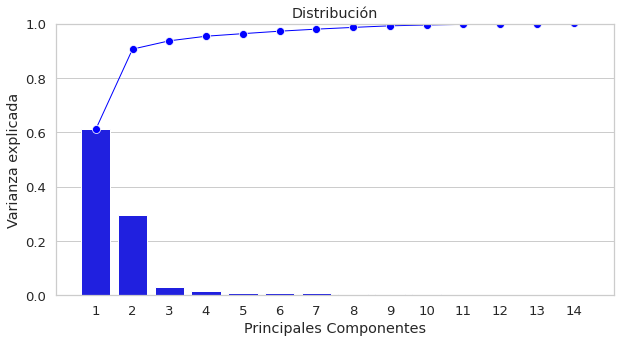

In [ ]:
#Ahora se elabora los histogramas de los atributos para visualizar su distribución
PC_components = np.arange(varianza_dr.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 5))

_ = sns.barplot(x = PC_components, 
                y = varianza_dr.explained_variance_ratio_, 
                color = 'blue'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(varianza_dr.explained_variance_ratio_), 
                 color = 'blue', 
                 linestyle = '-', 
                 linewidth = 1, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Distribución')
plt.xlabel('Principales Componentes')
plt.ylabel('Varianza explicada')
plt.ylim(0, 1)
plt.show()

In [ ]:
((varianzaSummary_dr.iloc[2][2])*100).round(0)

94.0

In [ ]:
((varianzaSummary_dr.iloc[2][1])*100).round(2)

90.57

In [ ]:
varianzaSummary_dr.columns = ['PC{}'.format(i) for i in range(1, len(varianzaSummary_dr.columns) + 1)]
varianzaSummary_dr.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,166585.0753,115824.7017,37256.8166,27747.1030,20698.6823,20278.0072,18520.7019,17040.2350,16294.1101,11615.2249,10413.1020,8786.7540,8197.6489,9.1139
Proportion of variance,0.6106,0.2952,0.0305,0.0169,0.0094,0.0090,0.0075,0.0064,0.0058,0.0030,0.0024,0.0017,0.0015,0.0000
Cumulative proportion,0.6106,0.9057,0.9363,0.9532,0.9626,0.9717,0.9792,0.9856,0.9915,0.9944,0.9968,0.9985,1.0000,1.0000


In [ ]:
varianza_dr.components_

array([[ 4.91051249e-01,  5.56462827e-06,  3.88614777e-01,
         3.81500219e-01,  3.72316835e-01,  3.46509376e-01,
         3.23011793e-01,  3.08673561e-01,  2.65507164e-02,
         3.12770650e-02,  2.68070179e-02,  2.21621169e-02,
         2.21853695e-02,  2.48009681e-02],
       [ 8.69327754e-01,  8.29040076e-06, -2.21093578e-01,
        -2.26152724e-01, -2.16301840e-01, -1.93842429e-01,
        -1.76598449e-01, -1.67159508e-01,  5.71363887e-03,
         1.08089432e-02,  1.09872540e-02,  1.03870690e-02,
         1.16983563e-02,  1.53688818e-02],
       [-2.05568406e-02, -4.10147427e-06, -5.48883056e-01,
        -3.90963429e-01, -4.81292082e-02,  2.61019218e-01,
         4.28087752e-01,  4.83714530e-01,  3.74864969e-02,
         1.60057940e-01,  1.35142204e-01,  9.44275935e-02,
         5.58917508e-02, -2.09386269e-02],
       [-1.84118341e-02, -2.41286925e-07, -2.04861603e-01,
        -3.77746536e-02,  5.53447008e-01,  7.90910967e-02,
        -2.00097645e-01, -3.08367938e-01,  1.

In [ ]:
pcsComponents_dr = pd.DataFrame(varianza_dr.components_.transpose(), 
                                columns = varianzaSummary_dr.columns,
                                index = count_number.iloc[:, 0:].columns
                                )
pcsComponents_dr.iloc[:,:14]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Credit,0.491051,0.869328,-0.020557,-1.841183e-02,-0.044128,0.016899,-0.001114,0.001028,0.009472,3.750818e-03,0.005828,0.000018,0.001869,-1.036322e-05
Age,0.000006,0.000008,-0.000004,-2.412869e-07,-0.000005,0.000002,-0.000001,-0.000002,0.000007,-2.084484e-07,0.000005,-0.000009,-0.000002,1.000000e+00
Bill_September,0.388615,-0.221094,-0.548883,-2.048616e-01,0.316883,0.002628,-0.456336,0.007253,0.070332,1.726640e-01,-0.267354,-0.204612,-0.005862,-2.626138e-06
Bill_August,0.381500,-0.226153,-0.390963,-3.777465e-02,0.011474,-0.080547,0.526906,-0.066039,0.099272,7.921287e-03,0.351050,0.476459,0.015960,7.238483e-07
Bill_July,0.372317,-0.216302,-0.048129,5.534470e-01,-0.247591,0.295830,0.028716,0.081260,-0.108043,-3.365400e-01,0.151470,-0.441650,-0.082454,-6.009492e-06
Bill_June,0.346509,-0.193842,0.261019,7.909110e-02,-0.367888,-0.473240,-0.178228,-0.227742,-0.097404,-1.369191e-01,-0.374919,0.233508,0.318929,4.213201e-06
Bill_May,0.323012,-0.176598,0.428088,-2.000976e-01,-0.015793,-0.078343,-0.013436,0.480093,0.126480,1.009797e-01,-0.052465,0.092393,-0.605506,1.563479e-06
Bill_April,0.308674,-0.167160,0.483715,-3.083679e-01,0.226878,0.391800,0.076828,-0.262898,-0.105467,2.368137e-01,0.203118,-0.158543,0.366214,6.051477e-07
Previuos_September,0.026551,0.005714,0.037486,1.934771e-01,0.202460,-0.228048,0.611722,-0.082590,0.170884,2.791503e-01,-0.470900,-0.396527,-0.017225,-1.491517e-07
Previuos_August,0.031277,0.010809,0.160058,6.733127e-01,0.337296,0.107598,-0.254751,-0.004666,0.226391,3.580915e-01,0.023462,0.383966,0.046985,3.551963e-06


In [ ]:
#PREPROCESAMIENTO
pcsComponents_dr = pd.DataFrame(varianza_dr.components_.transpose(), 
                                columns = varianzaSummary_dr.columns,
                                index = count_number.iloc[:, 0:].columns
                                )
pcsComponents_dr

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Credit,0.491051,0.869328,-0.020557,-1.841183e-02,-0.044128,0.016899,-0.001114,0.001028,0.009472,3.750818e-03,0.005828,0.000018,0.001869,-1.036322e-05
Age,0.000006,0.000008,-0.000004,-2.412869e-07,-0.000005,0.000002,-0.000001,-0.000002,0.000007,-2.084484e-07,0.000005,-0.000009,-0.000002,1.000000e+00
Bill_September,0.388615,-0.221094,-0.548883,-2.048616e-01,0.316883,0.002628,-0.456336,0.007253,0.070332,1.726640e-01,-0.267354,-0.204612,-0.005862,-2.626138e-06
Bill_August,0.381500,-0.226153,-0.390963,-3.777465e-02,0.011474,-0.080547,0.526906,-0.066039,0.099272,7.921287e-03,0.351050,0.476459,0.015960,7.238483e-07
Bill_July,0.372317,-0.216302,-0.048129,5.534470e-01,-0.247591,0.295830,0.028716,0.081260,-0.108043,-3.365400e-01,0.151470,-0.441650,-0.082454,-6.009492e-06
Bill_June,0.346509,-0.193842,0.261019,7.909110e-02,-0.367888,-0.473240,-0.178228,-0.227742,-0.097404,-1.369191e-01,-0.374919,0.233508,0.318929,4.213201e-06
Bill_May,0.323012,-0.176598,0.428088,-2.000976e-01,-0.015793,-0.078343,-0.013436,0.480093,0.126480,1.009797e-01,-0.052465,0.092393,-0.605506,1.563479e-06
Bill_April,0.308674,-0.167160,0.483715,-3.083679e-01,0.226878,0.391800,0.076828,-0.262898,-0.105467,2.368137e-01,0.203118,-0.158543,0.366214,6.051477e-07
Previuos_September,0.026551,0.005714,0.037486,1.934771e-01,0.202460,-0.228048,0.611722,-0.082590,0.170884,2.791503e-01,-0.470900,-0.396527,-0.017225,-1.491517e-07
Previuos_August,0.031277,0.010809,0.160058,6.733127e-01,0.337296,0.107598,-0.254751,-0.004666,0.226391,3.580915e-01,0.023462,0.383966,0.046985,3.551963e-06


In [ ]:
varianzaSummary_dr.iloc[:, 0:].head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,166585.075260,115824.701657,37256.816552,27747.103018,20698.682256,20278.007203,18520.701884,17040.234998,16294.110103,11615.224907,10413.102035,8786.753999,8197.648912,9.113919e+00
Proportion of variance,0.610571,0.295166,0.030540,0.016939,0.009426,0.009047,0.007547,0.006389,0.005842,0.002968,0.002386,0.001699,0.001479,1.827572e-09
Cumulative proportion,0.610571,0.905738,0.936278,0.953218,0.962644,0.971691,0.979238,0.985627,0.991469,0.994437,0.996823,0.998521,1.000000,1.000000e+00


In [ ]:
pcs = PCA()
pcs.fit(preprocessing.scale(varianzaSummary_dr.iloc[:, 0:].dropna(axis=0)))

PCA()

In [ ]:
pcsSummary_dr= pd.DataFrame({'Standard deviation': np.sqrt(varianza_dr.explained_variance_),
                             'Proportion of variance': varianza_dr.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(varianza_dr.explained_variance_ratio_)
                             })

pcsSummary_dr = pcsSummary_dr.transpose()
pcsSummary_dr.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_dr.columns) + 1)]
pcsSummary_dr.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,166585.0753,115824.7017,37256.8166,27747.1030,20698.6823,20278.0072,18520.7019,17040.2350,16294.1101,11615.2249,10413.1020,8786.7540,8197.6489,9.1139
Proportion of variance,0.6106,0.2952,0.0305,0.0169,0.0094,0.0090,0.0075,0.0064,0.0058,0.0030,0.0024,0.0017,0.0015,0.0000
Cumulative proportion,0.6106,0.9057,0.9363,0.9532,0.9626,0.9717,0.9792,0.9856,0.9915,0.9944,0.9968,0.9985,1.0000,1.0000


In [ ]:
pcsSummary_dr.iloc[0,2]

6.213533547945123e-16

In [ ]:
pcs = PCA()

In [ ]:
pcs_dr = pcs.fit_transform(dr_scaled)
pcs_dr[:14]

array([[-1.95861347e+00, -5.36935548e-01,  1.33026326e+00,
        -1.76466173e-01,  1.78476835e-02,  2.77646145e-03,
         1.29010046e-02,  5.80885205e-02,  2.21268695e-01,
         2.02066015e-02,  1.68710287e-02, -3.14858410e-03,
         8.15558569e-03,  9.86538923e-03],
       [-1.73543639e+00, -2.17455383e-01,  8.63894947e-01,
        -2.80889399e-01,  4.94098943e-02, -1.18062416e-01,
         9.91641641e-02,  7.52386637e-02, -2.87026648e-01,
        -7.30485666e-02, -5.57769745e-03,  1.22574823e-02,
        -4.04768371e-03,  7.41830384e-04],
       [-1.22457257e+00, -2.85108665e-01,  2.13127766e-01,
        -7.66632559e-03,  1.26938297e-01, -6.20521778e-02,
        -1.40071875e-02,  8.40632249e-02,  2.82844658e-01,
        -1.60703686e-02,  1.12401687e-01, -8.04550604e-02,
        -4.13466939e-02, -5.71189238e-02],
       [-5.41595290e-01, -6.66646687e-01,  9.76280692e-02,
         2.92571245e-01,  8.85437669e-03,  1.09430096e-01,
        -1.34229136e-01,  6.32182383e-02,  5.

In [ ]:
#El Porcentaje de la varianza explicada por cada componente - El acumulado de la varianza explicada por cada componente
pcsSummary_dr = pd.DataFrame({
                              '% varianza explicada': np.round(pcs.
                                                               explained_variance_ratio_,4) * 100,
                              '% varianza acumulada': np.cumsum(pcs.
                                                                explained_variance_ratio_) * 100})
pcsSummary_dr

,% varianza explicada,% varianza acumulada
0,42.28,42.277891
1,12.26,54.533132
2,7.46,61.997411
3,6.61,68.605797
4,6.31,74.918180
5,6.23,81.152296
6,5.57,86.721112
7,5.19,91.911302
8,5.05,96.963631
9,1.89,98.852509


In [ ]:
#INCLUIMOS ETIQUETAS
#Lista de los componentes
pcs_labels = [f'PC{i + 1}' for i in range(len(dr_scaled.columns))]
pcsSummary_dr.index = pcs_labels
pcsSummary_dr

,% varianza explicada,% varianza acumulada
PC1,42.28,42.277891
PC2,12.26,54.533132
PC3,7.46,61.997411
PC4,6.61,68.605797
PC5,6.31,74.918180
PC6,6.23,81.152296
PC7,5.57,86.721112
PC8,5.19,91.911302
PC9,5.05,96.963631
PC10,1.89,98.852509


In [ ]:
#Se coloca valores en cada componente
pcs = pd.DataFrame(pcs_dr, columns =pcs_labels)

print("Varianza total variables originales: ", dr_scaled.var().sum())
print("Varianza total de los componentes: ", pcs.var().sum())

Varianza total variables originales:  14.000467336515669
Varianza total de los componentes:  14.000467336515666


In [ ]:
total_var =dr_scaled.var().sum()

pd.DataFrame({
  "Porcentaje Varianza": (dr_scaled.var()/ total_var) * 100,
  "Porcentaje Varianza Acumulado": (dr_scaled.var().cumsum() / total_var) *100
})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
Credit,7.142857,7.142857
Age,7.142857,14.285714
Bill_September,7.142857,21.428571
Bill_August,7.142857,28.571429
Bill_July,7.142857,35.714286
Bill_June,7.142857,42.857143
Bill_May,7.142857,50.000000
Bill_April,7.142857,57.142857
Previuos_September,7.142857,64.285714
Previuos_August,7.142857,71.428571


In [ ]:
comps_df = pd.DataFrame(
  varianza_dr.components_.round(4), # pcs.components  = pesos de cada uno de los componentes
  columns = pcs.columns,
  index = dr_scaled.columns) 
comps_df.iloc[:,:14]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Credit,0.4911,0.0,0.3886,0.3815,0.3723,0.3465,0.3230,0.3087,0.0266,0.0313,0.0268,0.0222,0.0222,0.0248
Age,0.8693,0.0,-0.2211,-0.2262,-0.2163,-0.1938,-0.1766,-0.1672,0.0057,0.0108,0.0110,0.0104,0.0117,0.0154
Bill_September,-0.0206,-0.0,-0.5489,-0.3910,-0.0481,0.2610,0.4281,0.4837,0.0375,0.1601,0.1351,0.0944,0.0559,-0.0209
Bill_August,-0.0184,-0.0,-0.2049,-0.0378,0.5534,0.0791,-0.2001,-0.3084,0.1935,0.6733,0.0283,-0.0403,0.0137,0.1232
Bill_July,-0.0441,-0.0,0.3169,0.0115,-0.2476,-0.3679,-0.0158,0.2269,0.2025,0.3373,0.3106,0.4364,0.3551,0.2852
Bill_June,0.0169,0.0,0.0026,-0.0805,0.2958,-0.4732,-0.0783,0.3918,-0.2280,0.1076,-0.5666,0.0203,0.2087,-0.3058
Bill_May,-0.0011,-0.0,-0.4563,0.5269,0.0287,-0.1782,-0.0134,0.0768,0.6117,-0.2548,-0.1526,0.0854,0.0602,0.0464
Bill_April,0.0010,-0.0,0.0073,-0.0660,0.0813,-0.2277,0.4801,-0.2629,-0.0826,-0.0047,-0.3082,0.4481,-0.4816,0.3209
Previuos_September,0.0095,0.0,0.0703,0.0993,-0.1080,-0.0974,0.1265,-0.1055,0.1709,0.2264,0.2279,0.2273,-0.3075,-0.8113
Previuos_August,0.0038,-0.0,0.1727,0.0079,-0.3365,-0.1369,0.1010,0.2368,0.2792,0.3581,-0.2016,-0.5907,-0.3928,0.1477


In [71]:
pcsSummary_df= pd.DataFrame({'Standard deviation': np.sqrt(varianza_dr.explained_variance_),
                             'Proportion of variance': varianza_dr.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(varianza_dr.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,166585.0753,115824.7017,37256.8166,27747.1030,20698.6823,20278.0072,18520.7019,17040.2350,16294.1101,11615.2249,10413.1020,8786.7540,8197.6489,9.1139
Proportion of variance,0.6106,0.2952,0.0305,0.0169,0.0094,0.0090,0.0075,0.0064,0.0058,0.0030,0.0024,0.0017,0.0015,0.0000
Cumulative proportion,0.6106,0.9057,0.9363,0.9532,0.9626,0.9717,0.9792,0.9856,0.9915,0.9944,0.9968,0.9985,1.0000,1.0000


In [ ]:
comps_df.iloc[:,:7].abs().idxmax()

PC1               Age
PC2    Previuos_April
PC3    Bill_September
PC4          Bill_May
PC5       Bill_August
PC6         Bill_June
PC7      Previous_May
dtype: object

In [ ]:
comps_df.iloc[:,:14].abs().idxmax()

PC1                    Age
PC2         Previuos_April
PC3         Bill_September
PC4               Bill_May
PC5            Bill_August
PC6              Bill_June
PC7           Previous_May
PC8         Bill_September
PC9               Bill_May
PC10           Bill_August
PC11             Bill_June
PC12       Previuos_August
PC13            Bill_April
PC14    Previuos_September
dtype: object

In [ ]:
comps_df.abs().idxmax()

PC1                    Age
PC2         Previuos_April
PC3         Bill_September
PC4               Bill_May
PC5            Bill_August
PC6              Bill_June
PC7           Previous_May
PC8         Bill_September
PC9               Bill_May
PC10           Bill_August
PC11             Bill_June
PC12       Previuos_August
PC13            Bill_April
PC14    Previuos_September
dtype: object

In [ ]:
comps_df.PC1.abs().nlargest(5)

Age               0.8693
Credit            0.4911
Bill_July         0.0441
Bill_September    0.0206
Bill_August       0.0184
Name: PC1, dtype: float64

In [ ]:
comps_df.PC1.idxmax()

'Age'

In [ ]:
comps_df.PC2.idxmin()

'Credit'

In [ ]:
comps_df.PC2.abs().nsmallest(5)

Credit            0.0
Age               0.0
Bill_September    0.0
Bill_August       0.0
Bill_July         0.0
Name: PC2, dtype: float64

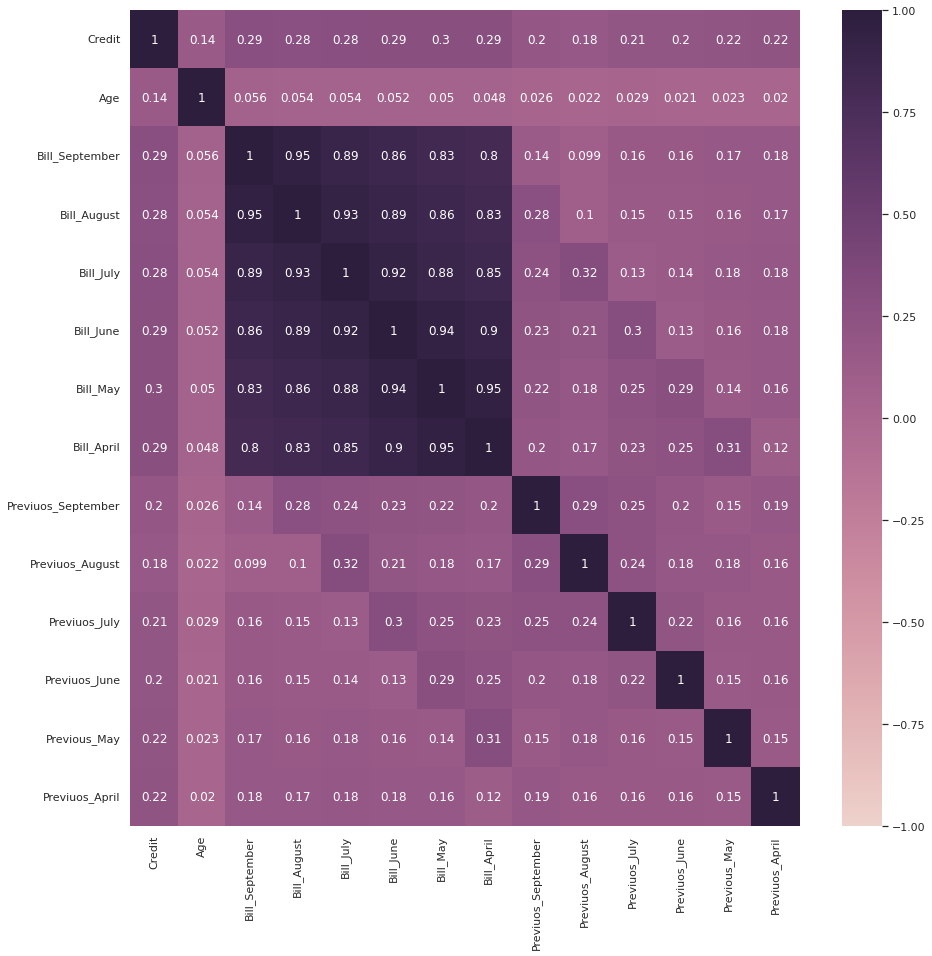

In [ ]:
#CORRELACIÓN ENTRE VARIABLES
corrs = count_number.corr()
sns.set(rc = {'figure.figsize':(15, 15)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = sns.cubehelix_palette(as_cmap=True), annot= True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9309884c50>,
      dtype=object)

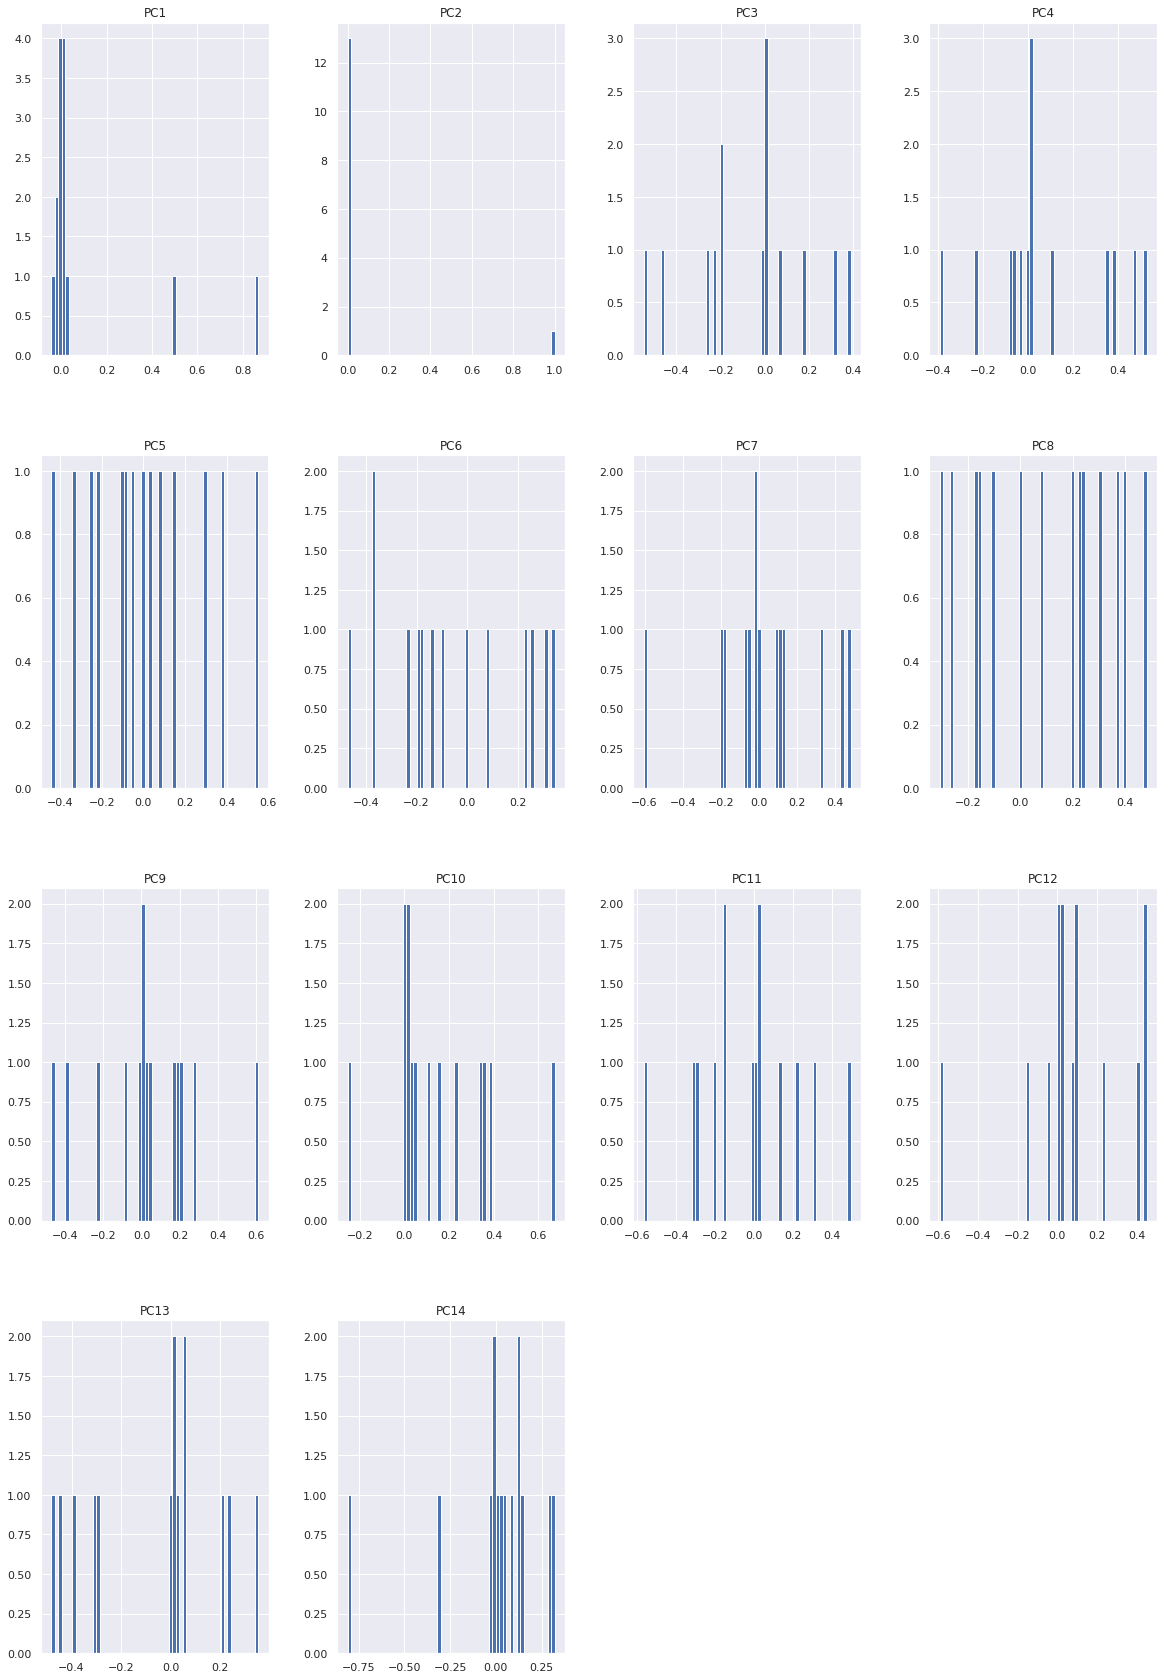

In [ ]:
comps_df.hist(bins = 60, figsize=(20,30))

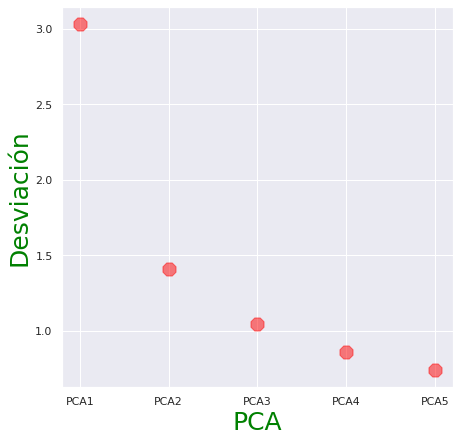

In [89]:
datos = {'PCA_V1': ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'], 
'Standard deviation': [3.0329,	1.4099,	1.0423,	0.8619,	0.7401]}

datos = pd.DataFrame(datos)

fig = plt.figure(figsize=(7, 7))
plt.scatter(datos['PCA_V1'], datos['Standard deviation'],
            marker = '8', s= 200, color = "red", alpha = 0.5)

plt.xlabel ('PCA', fontsize = 25, color = 'green')
plt.ylabel ('Desviación', fontsize = 25, color = 'green')
plt.show()

Conclusión:
En la ultima grafica podemos observar la comparativa entre los 5 componentes en base a la desviación estandar, mostrandonos una gran variación entre el primero y el segundo.
Con el uso de PCA, nos ayuda a estandarizar el rango de variables iniciales continuas, calcular la matriz de covarianza para identificar correlaciones, calcular los vectores propios y los valores propios de la matriz de covarianza para identificar los componentes principales, crear un vector de características para decidir qué componentes principales mantener y reformular los datos a lo largo de los ejes de los componentes principales. 
Aprendí a comprender cómo las variables del conjunto de datos de entrada están variando de la media entre sí, y de igual forma, me ayudar a ver si exite una relación entre ellas.

Ahora sabemos que es importante organizar la información en componentes principales. De esta manera, permitirá reducir la dimensionalidad sin perder mucha información, y esto al descartar los componentes con poca información y considerar los componentes restantes como tus nuevas variables.
